# Customer Lifetime Value Prediction

Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

## Business Problem
An Auto Insurance company in the USA is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering Customer Lifetime Value CLV as a parameter for this purpose. Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their ads in more detail, and much more.

## Project Overview
- The objective of the problem is to accurately predict the Customer Lifetime Value(CLV) of the customer for an Auto Insurance Company

## Dataset Description
The dataset represents Customer lifetime value of an Auto Insurance Company in the United States, it includes over 24 features and 9134 records to analyze the lifetime value of Customer.

## Random forest feature importance

## Importing Libraries

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

# Ignore the specific warning
warnings.filterwarnings("ignore")




In [315]:
auto_insurance = pd.read_excel(r"C:\Users\Prathamesh\Downloads\AutoInsurance.xlsx")


In [316]:
auto_insurance.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [317]:
auto_insurance.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [318]:
print("The number of rows:",auto_insurance.shape[0])
print("The number of columns:",auto_insurance.shape[1])

The number of rows: 9134
The number of columns: 24


In [319]:
auto_insurance.describe()   # if std the value is  more than mean their is a chances of outlier present in the particular column

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [320]:
auto_insurance.rename(columns={'Customer Lifetime Value' : 'CLV'},inplace = True)
auto_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [321]:
numeric_cols = auto_insurance.select_dtypes(include=['int64','float64'])  # this is a easy way to separate the numeric columns
numeric_cols.columns    

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [322]:
numerical_cols = numeric_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

In [323]:
numerical_cols

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


## Summary Statistics of Numerical features

In [324]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [325]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLV                            9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 428.3 KB


# EDA on Numerical Dada

- CLV = Target Variable Analysis

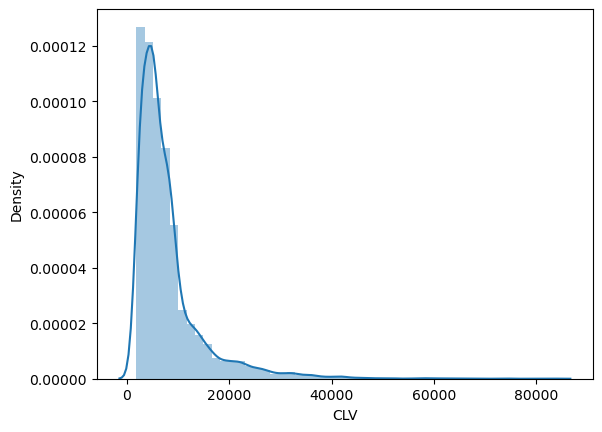

In [326]:
sns.distplot(numerical_cols['CLV'])
plt.show()

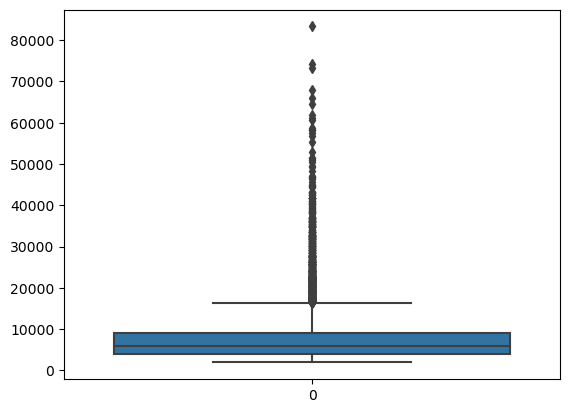

In [327]:
sns.boxplot(numerical_cols['CLV'])
plt.show()

In [328]:
numerical_cols['CLV'].skew()

3.0322802599299847

- Conclusion - From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

## Income - Independent Variable
- Univariate Analysis - Means Analysis on the single Variable

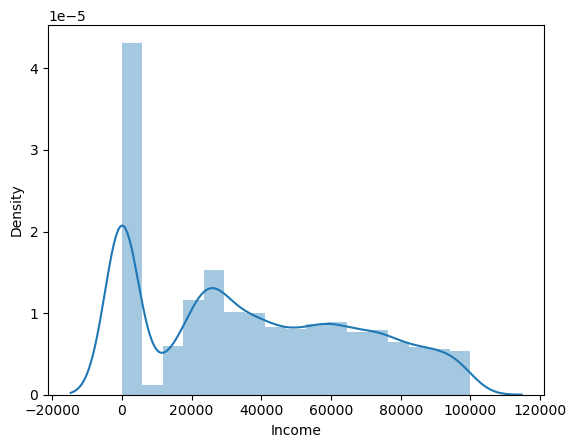

In [329]:
sns.distplot(numerical_cols['Income'])
plt.show()

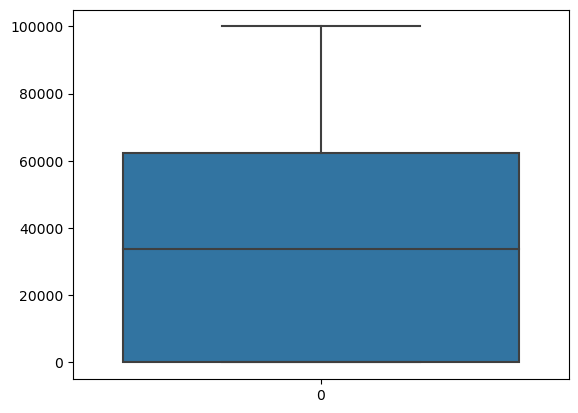

In [330]:
sns.boxplot(numerical_cols['Income'])
plt.show()

- Bivarirate Analysis - Means Comparing between two variables 
- Analysis on Income & CLV

<Axes: xlabel='Income', ylabel='CLV'>

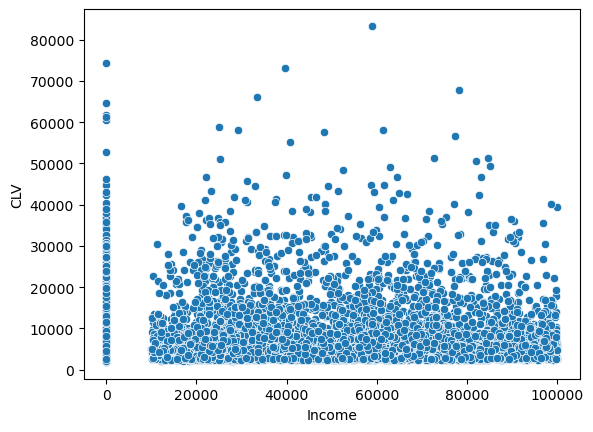

In [331]:
sns.scatterplot(x="Income",y="CLV",data = numerical_cols)

- Conclusion - there is no linear relationship between income and CLV



 - Monthly Premium Auto

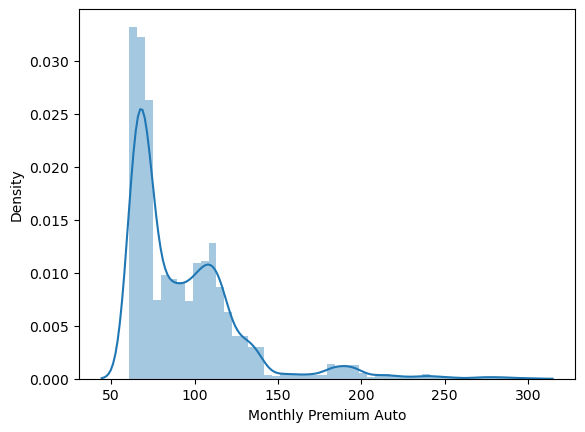

In [332]:
sns.distplot(numerical_cols['Monthly Premium Auto'])
plt.show()

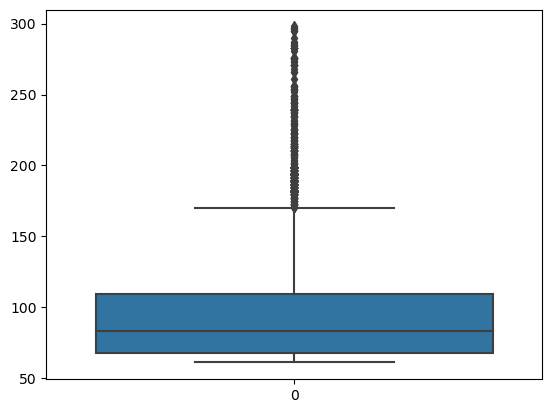

In [333]:
sns.boxplot(numerical_cols['Monthly Premium Auto'])
plt.show()

- Bivariate Analysis

<Axes: xlabel='Monthly Premium Auto', ylabel='CLV'>

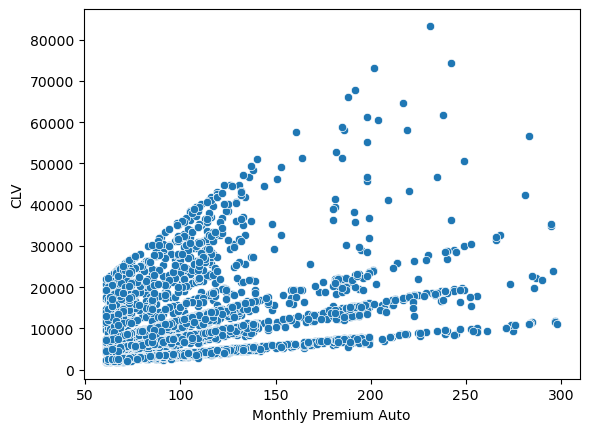

In [334]:
sns.scatterplot(x="Monthly Premium Auto",y="CLV",data = numerical_cols)

- There is linear relationship between income and CLV

- Months Since Last Claim

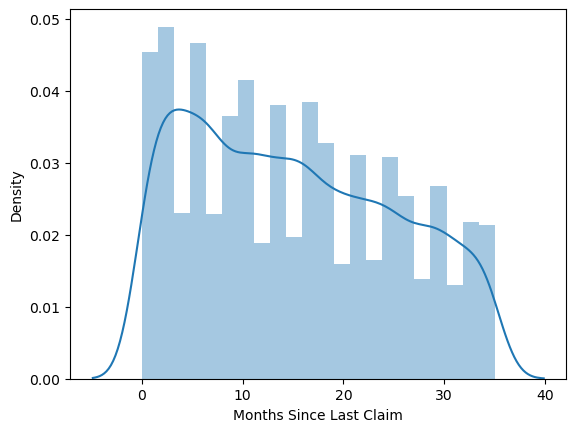

In [335]:
sns.distplot(numerical_cols['Months Since Last Claim'])
plt.show()

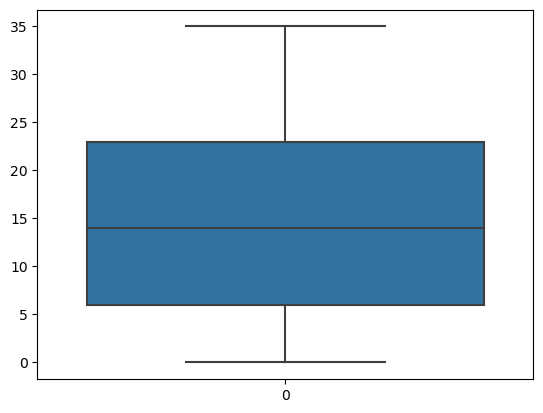

In [336]:
sns.boxplot(numerical_cols['Months Since Last Claim'])
plt.show()

- Bivariate Analysis

<Axes: xlabel='Months Since Last Claim', ylabel='CLV'>

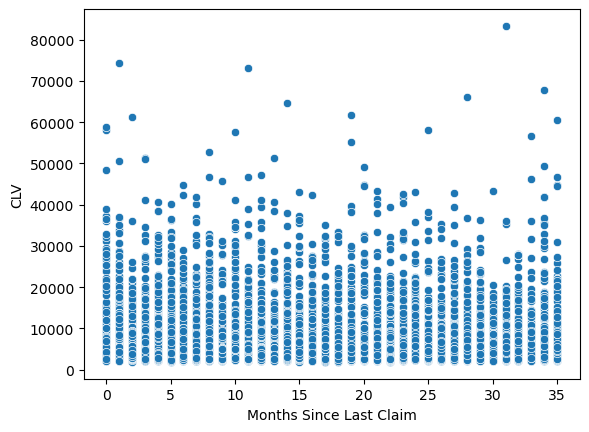

In [337]:
sns.scatterplot(x="Months Since Last Claim",y="CLV",data = numerical_cols)

There is no linear relationship

- Months Since Policy Inception

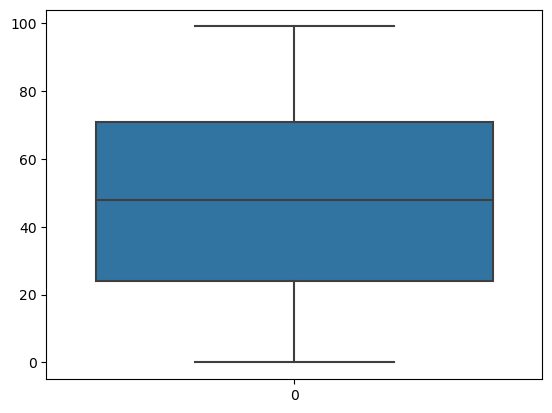

In [338]:
sns.boxplot(numerical_cols['Months Since Policy Inception'])
plt.show()

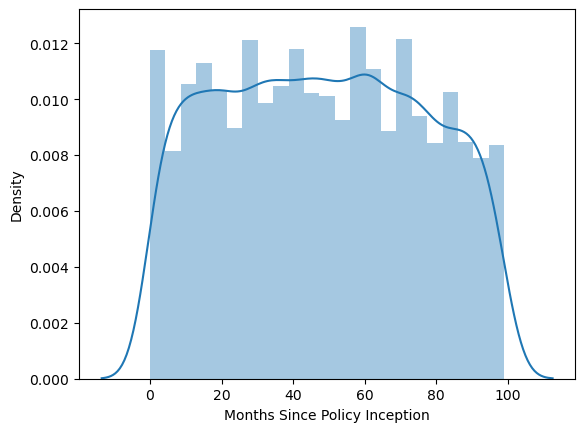

In [339]:
sns.distplot(numerical_cols['Months Since Policy Inception'])
plt.show()

- Total claim amount

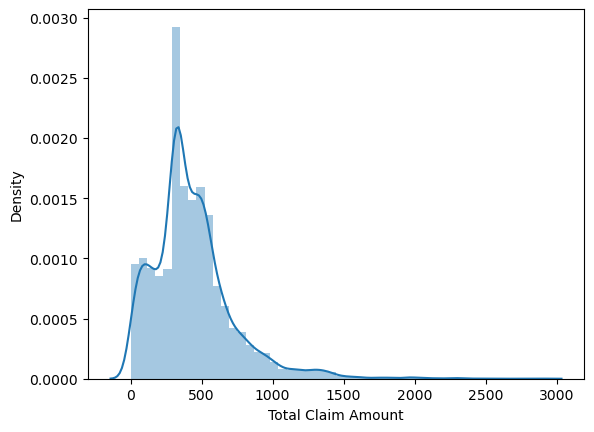

In [340]:
sns.distplot(numerical_cols['Total Claim Amount'])
plt.show()

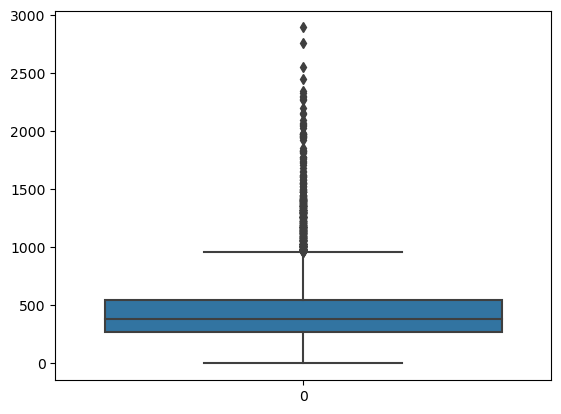

In [341]:
sns.boxplot(numerical_cols['Total Claim Amount'])
plt.show()

<Axes: xlabel='Total Claim Amount', ylabel='CLV'>

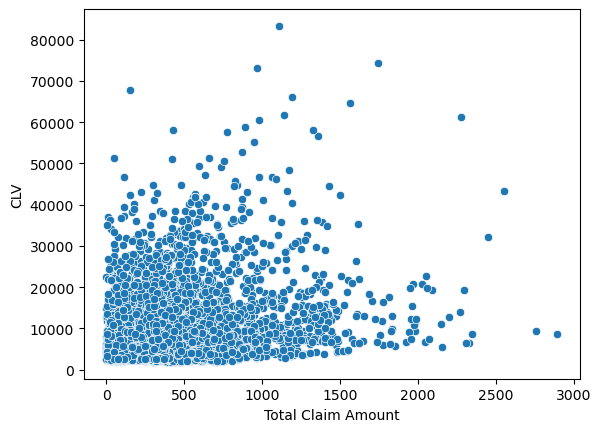

In [342]:
sns.scatterplot(x="Total Claim Amount",y="CLV",data = numerical_cols)

- There is a linear relationship between CLV and Total Claim Amount

- The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

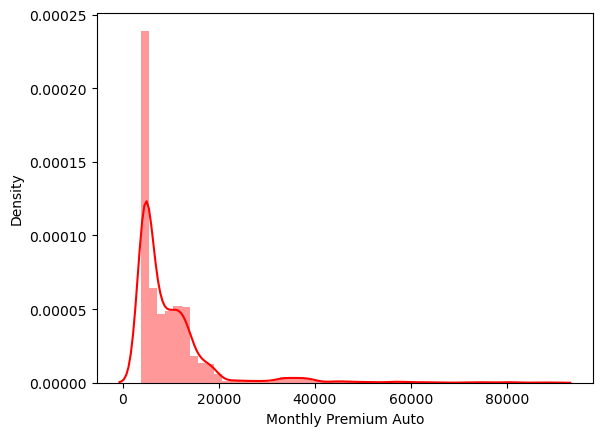

In [343]:
sns.distplot(np.square(numerical_cols["Monthly Premium Auto"]),color='r')
plt.show()

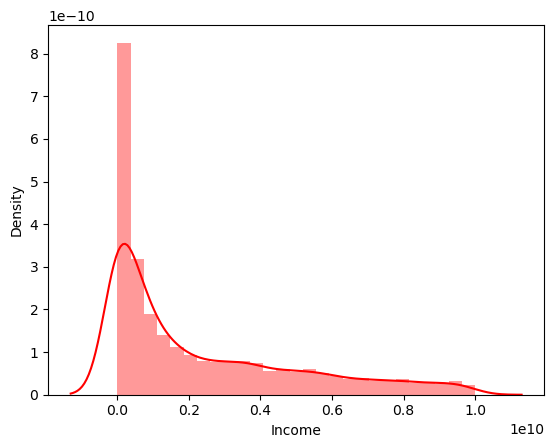

In [344]:
sns.distplot(np.square(numerical_cols["Income"]),color='r')
plt.show()

- Conclusion - But as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building

## Categorical variables

In [345]:
cat_cols = auto_insurance.select_dtypes(include="object")


In [346]:
no_col = auto_insurance[["Number of Open Complaints","Number of Policies"]]

In [347]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [348]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03 00:00:00,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [349]:
# droping the Effective To Date

In [350]:
cat_cols.drop('Effective To Date',axis=1,inplace = True)


In [351]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [352]:
for i in cat_cols:
    print("Unique values in",str(i),"is",auto_insurance[i].nunique())
    print(auto_insurance[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
Customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
-----------------------------------------
Unique values in Response is 2
Response
No     7826
Yes    1308
Name: count, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
-----------------------------------------
Unique values in Education is 5
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
-------------------------------

# State

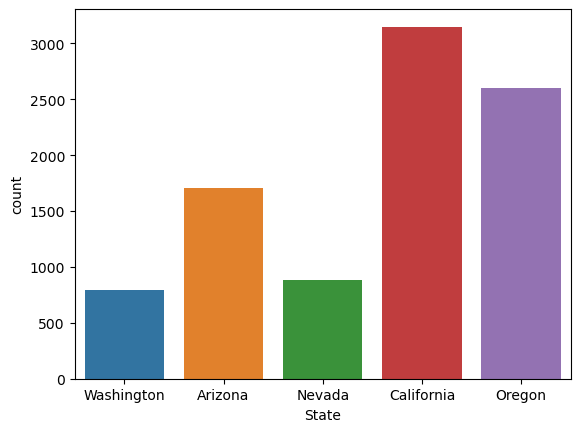

In [353]:
sns.countplot(x = 'State', data = cat_cols)
plt.show()

 - Conclusion - seems that Most number of people are residing in california

# Response

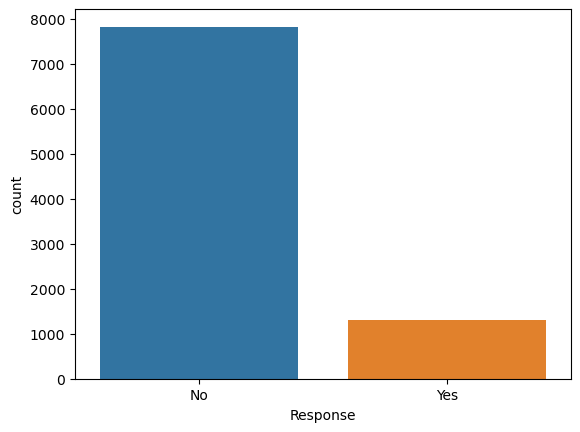

In [354]:
sns.countplot(x = 'Response', data = cat_cols)
plt.show()

- Conclusion- Its seems that less than 1400 customers have responded to the marketing calls

# Coverage

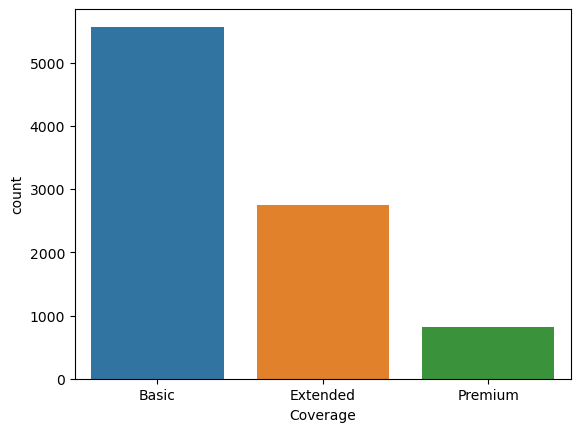

In [355]:
sns.countplot(x = 'Coverage', data = cat_cols)
plt.show()

# Education

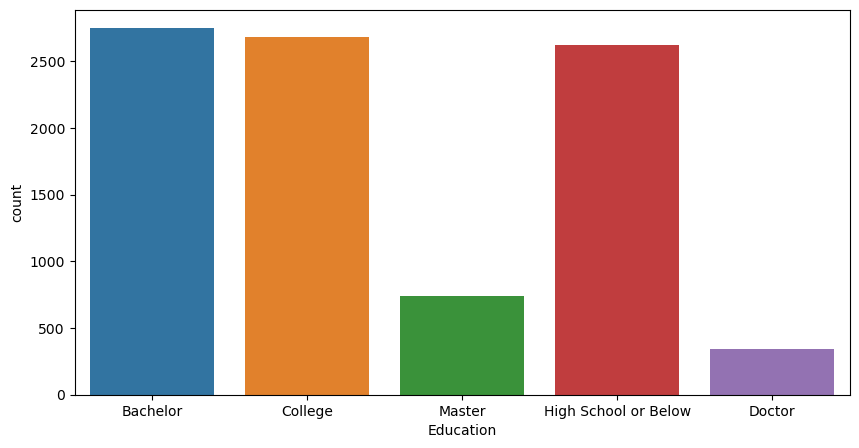

In [356]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Education', data = cat_cols)
plt.show()

Most of the customers have either a bachelor or college degree

# EmploymentStatus

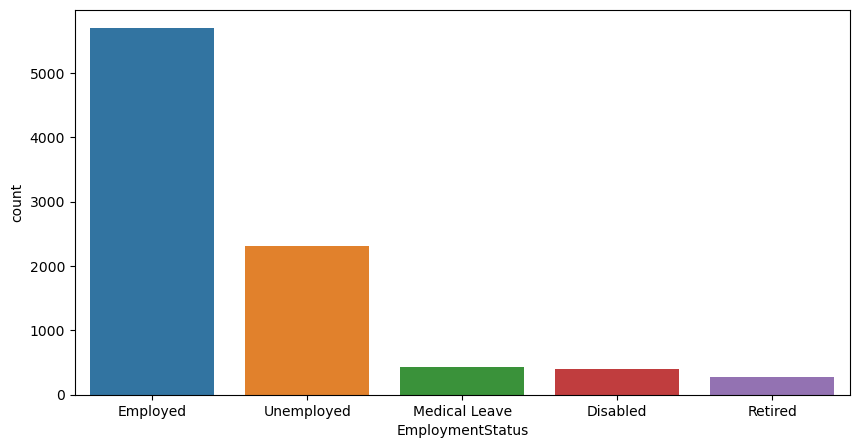

In [357]:
plt.figure(figsize=(10,5))
sns.countplot(x = "EmploymentStatus" ,data = cat_cols )
# plt.savefig("empstatus.png")
plt.show()

In [358]:
cat_cols["EmploymentStatus"].value_counts(normalize=True)*100

EmploymentStatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: proportion, dtype: float64

**Around 62.38% of the customers are employed**

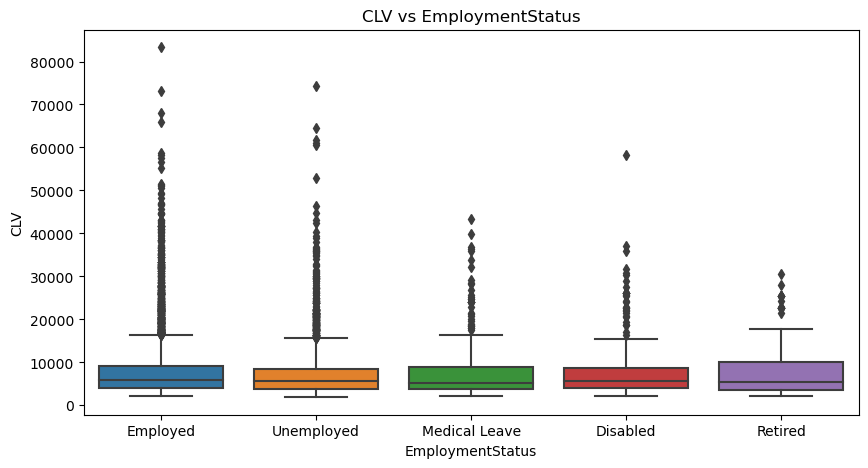

In [359]:
plt.figure(figsize=(10,5))
sns.boxplot(x='EmploymentStatus',y='CLV', data = auto_insurance)
plt.title("CLV vs EmploymentStatus")
# plt.savefig("bi1.png")
plt.show()

# Gender

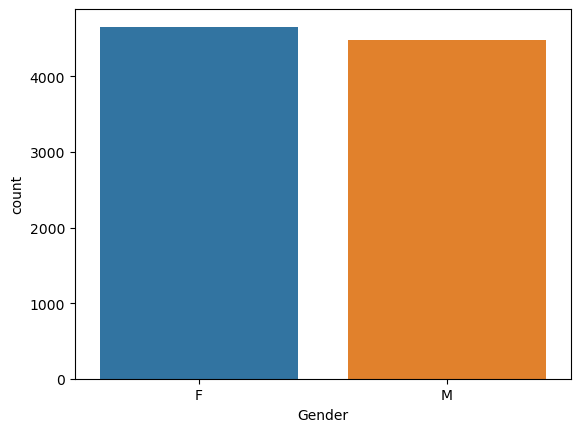

In [360]:
sns.countplot(x = 'Gender', data = cat_cols)
plt.show()

In [361]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

### Location Code

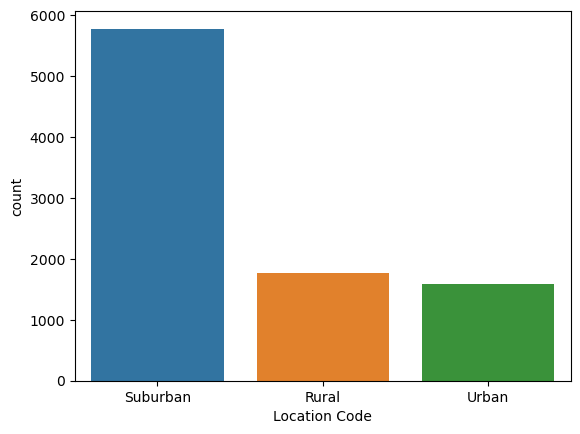

In [362]:
sns.countplot(x = 'Location Code' , data = cat_cols)
plt.show()

### Marital Status

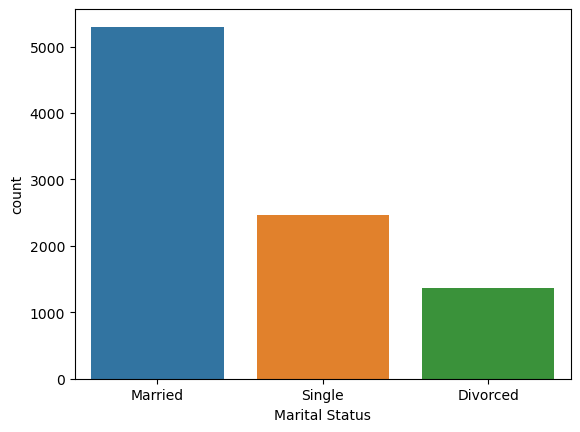

In [363]:
sns.countplot(x = 'Marital Status', data = cat_cols)
plt.show()

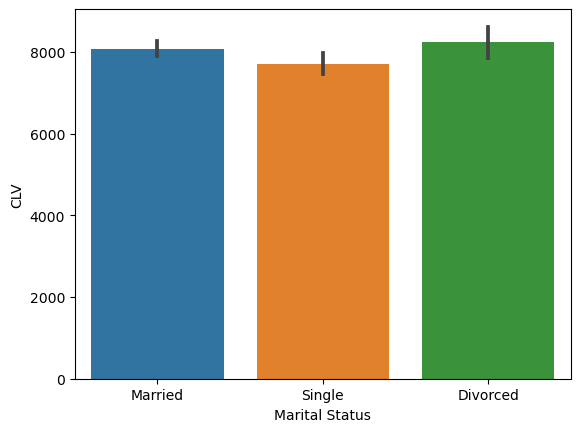

In [364]:
sns.barplot(x = "Marital Status" , y= "CLV" , data = auto_insurance)
plt.show()

### Policy Type

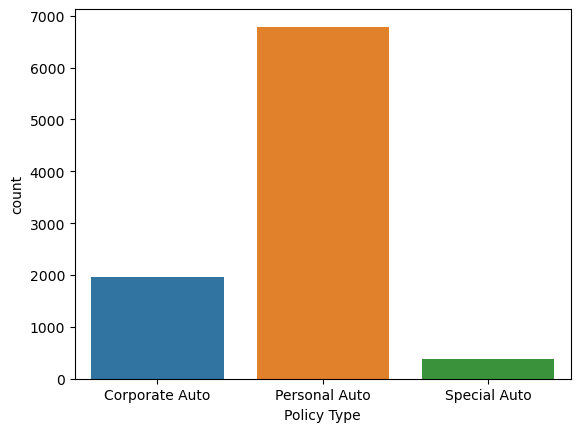

In [365]:
sns.countplot(x ="Policy Type", data = cat_cols)
plt.show()

### Policy

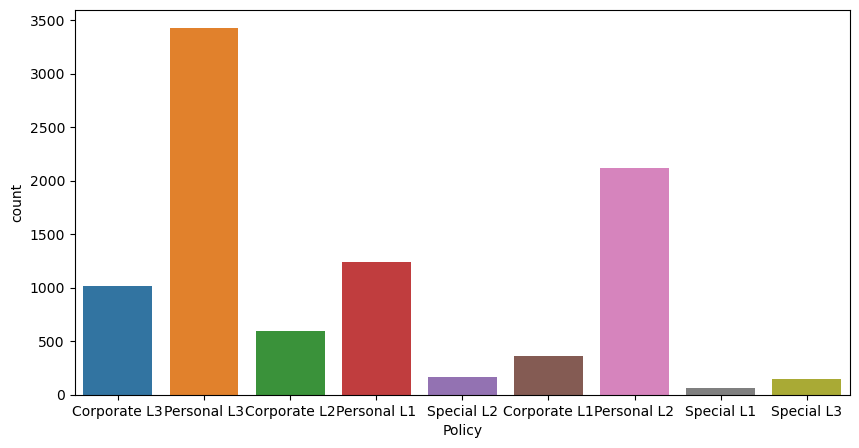

In [366]:
plt.figure(figsize= (10,5))
sns.countplot(x ="Policy", data = cat_cols)
plt.show()

Personal L3 policy subcategory has the most number of customers

### Renew Offer type

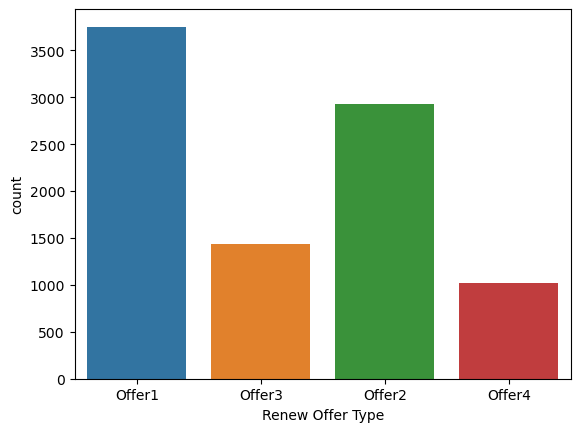

In [367]:
sns.countplot(x ="Renew Offer Type", data = cat_cols)
plt.show()

### Sales Channel

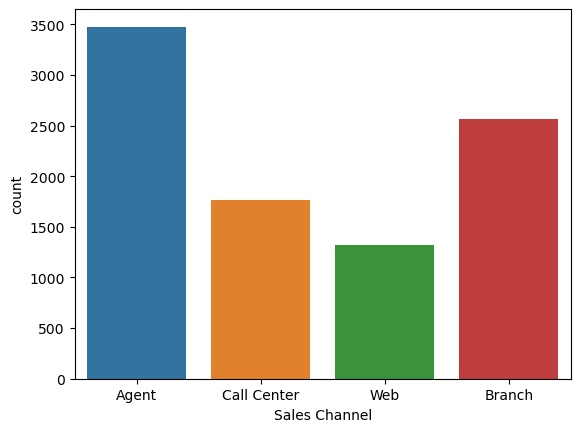

In [368]:
sns.countplot(x ="Sales Channel", data = cat_cols)
plt.show()

### Vehicle Class

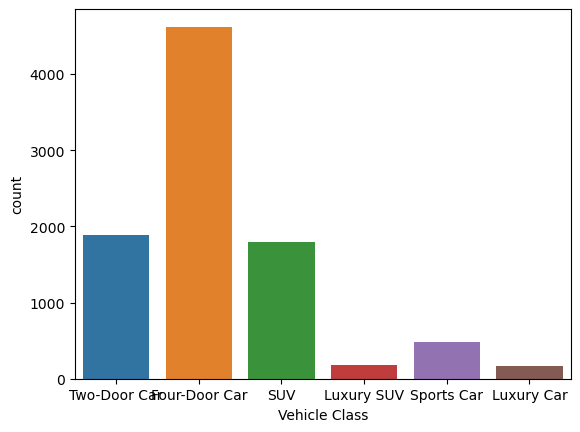

In [369]:
sns.countplot(x ="Vehicle Class", data = cat_cols)
plt.show()

### Vehicle Size

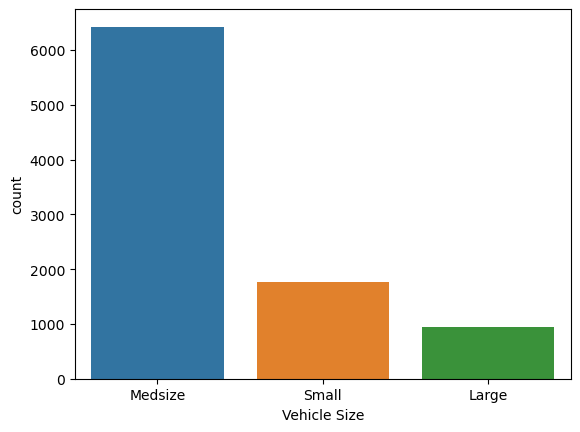

In [370]:
sns.countplot(x ="Vehicle Size", data = cat_cols)
plt.show()

### Number of Open Complaints

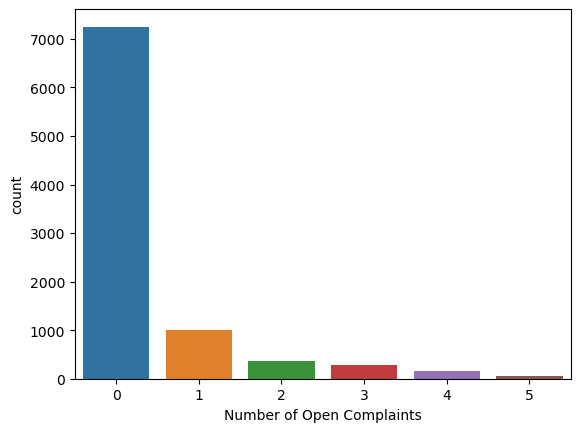

In [371]:
sns.countplot(x ="Number of Open Complaints", data = cat_cols)
plt.show()

### Number of Policies

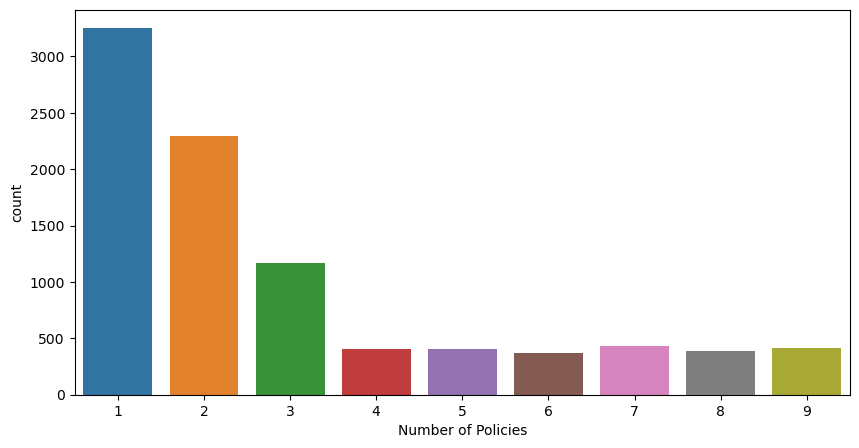

In [372]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Number of Policies" , data = cat_cols)
plt.show()

In [373]:
auto_insurance['Effective To Date']=pd.to_datetime(auto_insurance['Effective To Date'],infer_datetime_format=True)

In [374]:
auto_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   CLV                            9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [375]:
auto_insurance["Months"] = auto_insurance["Effective To Date"].dt.month

In [376]:
auto_insurance.dtypes

Customer                                 object
State                                    object
CLV                                     float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [377]:
auto_insurance['Months'] = auto_insurance['Months'].astype('object')


In [378]:
auto_insurance.dtypes

Customer                                 object
State                                    object
CLV                                     float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

### Months

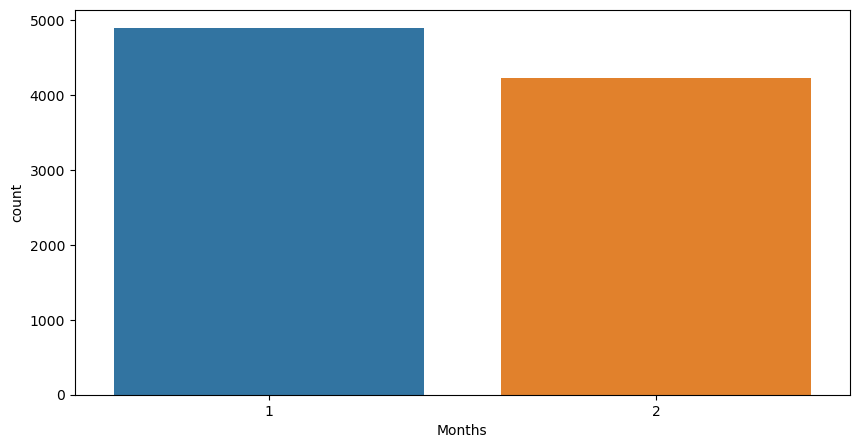

In [379]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Months", data = auto_insurance)
plt.show()

In [380]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [381]:
auto_insurance.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

In [382]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Total Claim Amount'],
      dtype='object')

## HeatMap

In [383]:
numerical_cols.corr()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
CLV,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


In [384]:
heatmap = numerical_cols[['CLV','Income','Monthly Premium Auto','Total Claim Amount']]

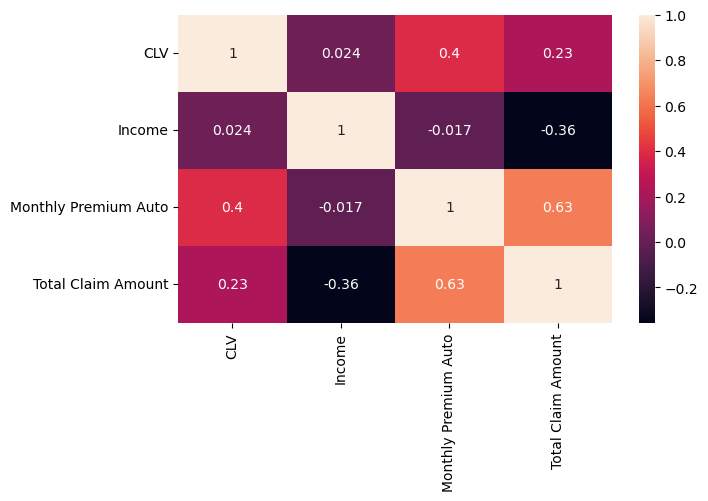

In [385]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

**We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and** **acceptable correlation with total claim amount.**

# Statistical Significance

## We will do Hypothesis Testing to find relevant features to predict CLV

<Axes: xlabel='CLV', ylabel='Density'>

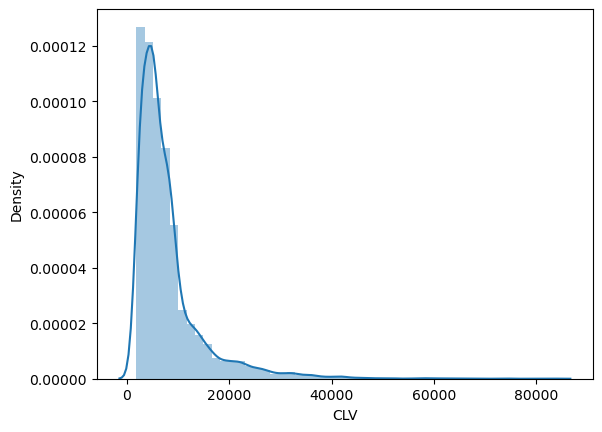

In [386]:
sns.distplot(auto_insurance["CLV"])

In [387]:
auto_insurance["CLV"].skew()

3.0322802599299847

- H0:The null hypothesis of the test is the data is normally distributed
- HA:The data is not normally distributed

In [388]:
stats.shapiro(auto_insurance['CLV'])
#p-value may not be accurate for N > 5000."

ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

#### p-value less than 0.05 we reject null hypothesis the data is not normally distributed



#### We will proceed with non parametric tests since the dependent variable is not normally distributed

In [389]:
cat_cols_l=list(cat_cols.columns)
cat_cols_l

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [390]:
manwhiteneyy = []
anova = []

for i in cat_cols_l:
    if (auto_insurance[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


### Response and CLV

- H0, the distributions of both populations are equal
- H1, The alternative hypothesis H1 is that the distributions are not equal.    

In [391]:
yes=auto_insurance[auto_insurance['Response']=='No']['CLV']
no=auto_insurance[auto_insurance['Response']=='Yes']['CLV']

<Axes: xlabel='CLV', ylabel='Density'>

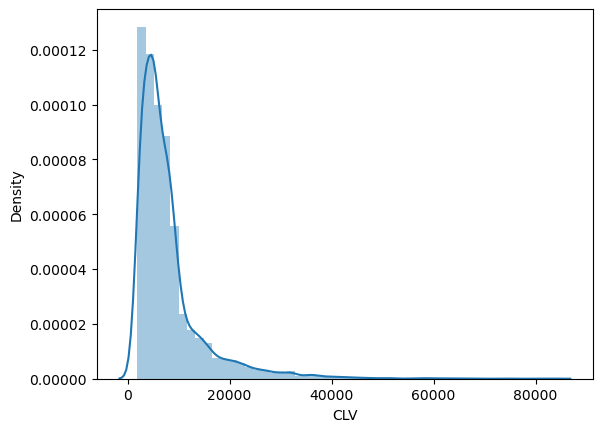

In [392]:
sns.distplot(yes)

<Axes: xlabel='CLV', ylabel='Density'>

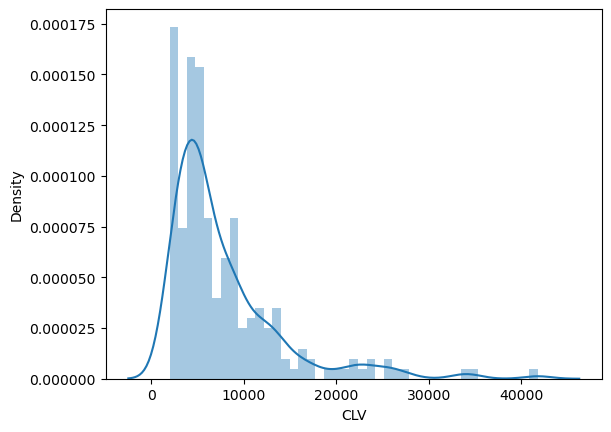

In [393]:
sns.distplot(no)

<Axes: xlabel='CLV', ylabel='Density'>

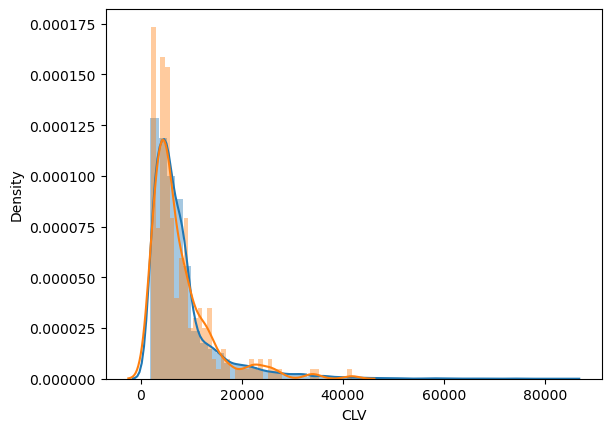

In [394]:
sns.distplot(yes)
sns.distplot(no)

In [395]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)


#### p-value is greater than significance level 0.05 so we can accept the null hypothesis so the conclusion is that The distributions of both populations are equal.

# Gender and CLV

- H0, the distributions of both populations are equal
- H1, The alternative hypothesis H1 is that the distributions are not equal. 

In [396]:
female=auto_insurance[auto_insurance['Gender']=='F']['CLV']
male=auto_insurance[auto_insurance['Gender']=='M']['CLV']

<Axes: xlabel='CLV', ylabel='Density'>

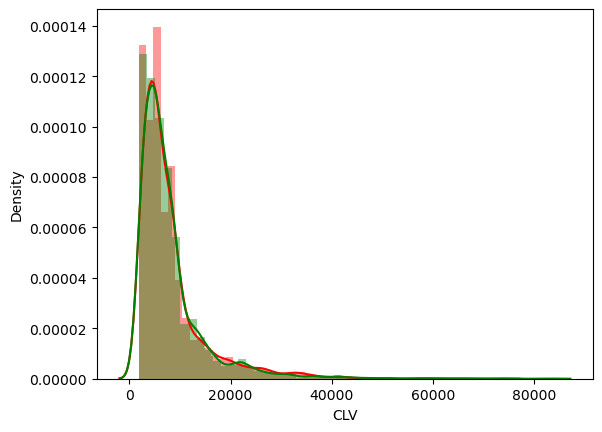

In [397]:
sns.distplot(female,color="red")
sns.distplot(male,color="green")

In [398]:
b = stats.mannwhitneyu(female,male)
print(b)

MannwhitneyuResult(statistic=10512074.0, pvalue=0.48749303056449833)


#### p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

#### we test above two features with non-Paramteric unpaired ttest and we concluded that those 2 features is not significant to predict traget

# State and CLV

- H0:the mean ranks of the groups are the same.
- H1:the mean ranks of the groups are not the same.

In [399]:
ca=auto_insurance[auto_insurance['State']=='California']['CLV']
Or=auto_insurance[auto_insurance['State']=='Oregon']['CLV']
Ar=auto_insurance[auto_insurance['State']=='Arizona']['CLV']
Ne=auto_insurance[auto_insurance['State']=='Nevada']['CLV']
Wa=auto_insurance[auto_insurance['State']=='Washington']['CLV']

<Axes: xlabel='CLV', ylabel='Density'>

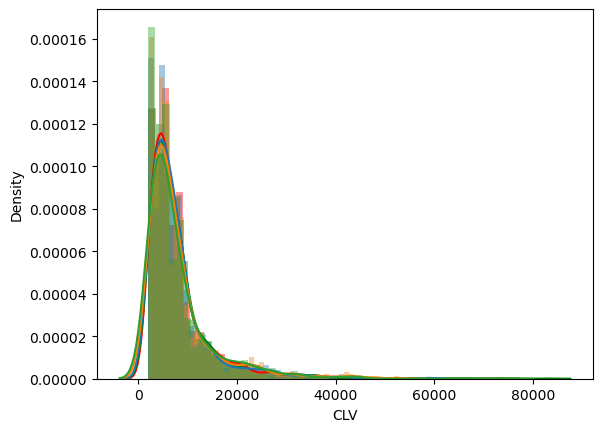

In [400]:
sns.distplot(ca,color="red")
sns.distplot(Or,color="green")
sns.distplot(Ar)
sns.distplot(Ne)
sns.distplot(Wa)


In [401]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)


#### p-value > 0.05 failed to reject H0

# Coverage

In [402]:
Ba=auto_insurance[auto_insurance['Coverage']=='Basic']['CLV']
Ex=auto_insurance[auto_insurance['Coverage']=='Extended']['CLV']
Pr=auto_insurance[auto_insurance['Coverage']=='Premium']['CLV']

<Axes: xlabel='CLV', ylabel='Density'>

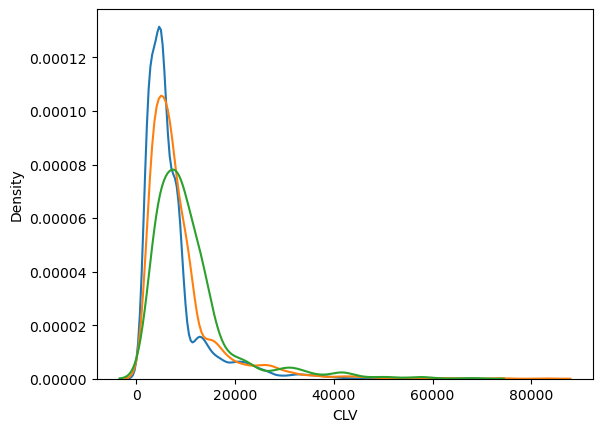

In [403]:
sns.distplot(Ba,hist=False,label='Basic')
sns.distplot(Ex,hist=False)
sns.distplot(Pr,hist=False)

In [404]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)


In [405]:
# pvalue=7.648852917746348e-110 this value is less than 0.05 coz it contains "e"

#### so the p-value is less than 0.05 we have to reject the null hypothesis that means all distributions are not identical .so we can use Coverage feature to predict CLV

In [406]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

# Education

In [407]:
Ba=auto_insurance[auto_insurance['Education']=='Bachelor']['CLV']
Co=auto_insurance[auto_insurance['Education']=='College']['CLV']
Hi=auto_insurance[auto_insurance['Education']=='High School or Below']['CLV']
Ma=auto_insurance[auto_insurance['Education']=='Master']['CLV']
Da=auto_insurance[auto_insurance['Education']=='Doctor']['CLV']

Text(0.5, 1.0, 'Different Education level comparsion with CLV')

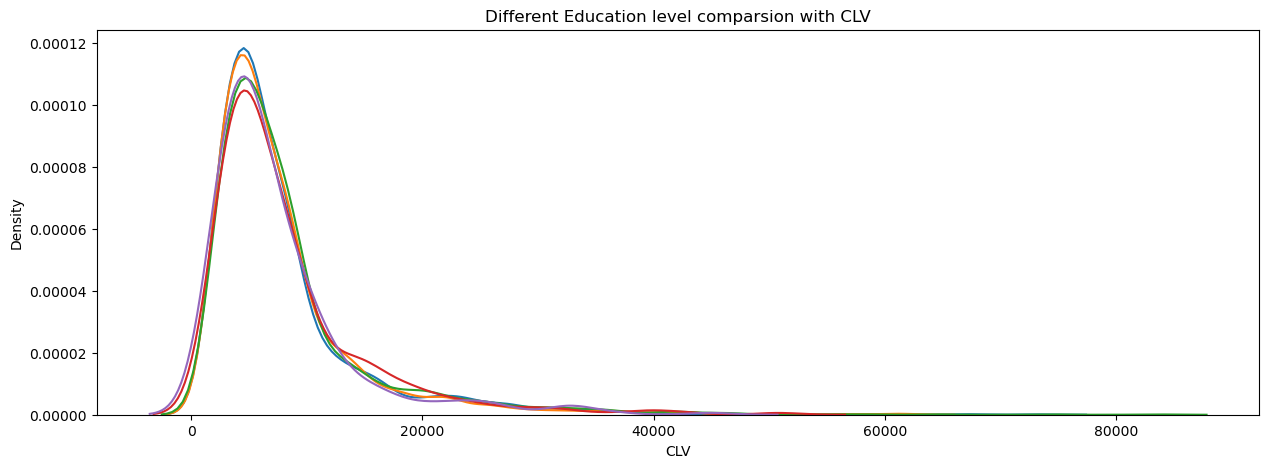

In [408]:
plt.figure(figsize=(15,5))
sns.distplot(Ba,hist=False,label='Bachelor')
sns.distplot(Co,hist=False,label='College')
sns.distplot(Hi,hist=False,label='High School or Below')
sns.distplot(Ma,hist=False,label='Master')
sns.distplot(Da,hist=False,label='Doctor')
plt.title("Different Education level comparsion with CLV")

In [409]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


 **p-value is less than 0.05 so we have to reject null hypothesis**

### EmploymentStatus

In [410]:
Ba=auto_insurance[auto_insurance['EmploymentStatus']=='Employed']['CLV']
Co=auto_insurance[auto_insurance['EmploymentStatus']=='Unemployed']['CLV']
Hi=auto_insurance[auto_insurance['EmploymentStatus']=='Medical Leave']['CLV']
Ma=auto_insurance[auto_insurance['EmploymentStatus']=='Disabled']['CLV']
Da=auto_insurance[auto_insurance['EmploymentStatus']=='Retired']['CLV']

Text(0.5, 1.0, 'Different EmploymentStatus comparsion with CLV')

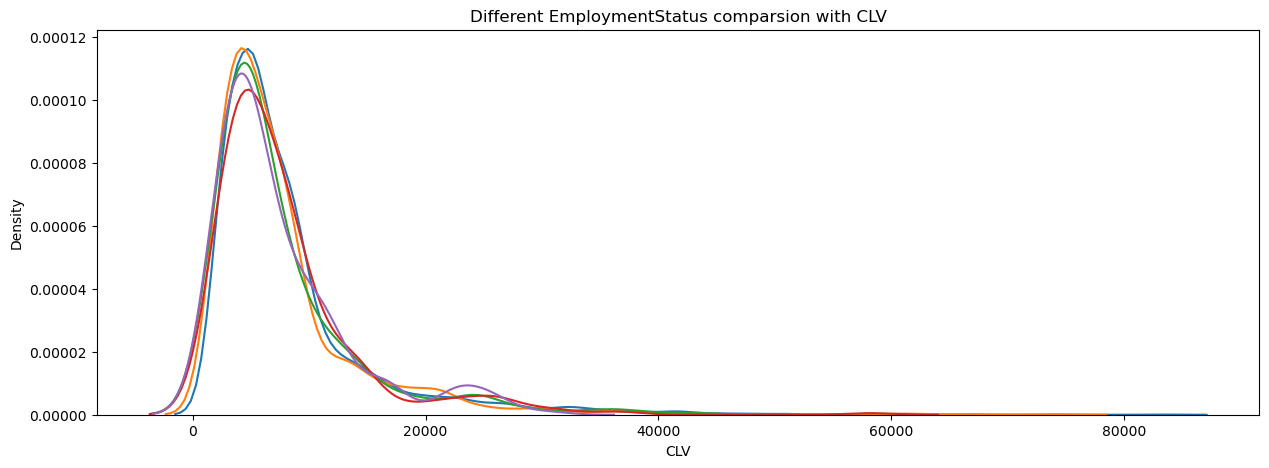

In [411]:
plt.figure(figsize=(15,5))
sns.distplot(Ba,hist=False,label='Employed')
sns.distplot(Co,hist=False,label='Unemployed')
sns.distplot(Hi,hist=False,label='Medical Leave')
sns.distplot(Ma,hist=False,label='Disabled')
sns.distplot(Da,hist=False,label='Retired')
plt.title("Different EmploymentStatus comparsion with CLV")

In [412]:
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)


**p-value < 0.05 reject H0, EmploymentStatus is significant in predicting CLV**

### Location Code

In [413]:
Ba=auto_insurance[auto_insurance['Location Code']=='Suburban']['CLV']
Co=auto_insurance[auto_insurance['Location Code']=='Rural']['CLV']
Hi=auto_insurance[auto_insurance['Location Code']=='Urban']['CLV']

In [414]:
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)


**p-value < 0.05 reject H0, Location Code can be significant in predicting CLV**

### Marital Status

In [415]:
Ba=auto_insurance[auto_insurance['Marital Status']=='Married']['CLV']
Co=auto_insurance[auto_insurance['Marital Status']=='Single']['CLV']
Hi=auto_insurance[auto_insurance['Marital Status']=='Divorced']['CLV']

In [416]:
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)


**p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV**

### Number of Open Complaints

In [417]:
Ba=auto_insurance[auto_insurance['Number of Open Complaints']==0]['CLV']
Co=auto_insurance[auto_insurance['Number of Open Complaints']==1]['CLV']
Hi=auto_insurance[auto_insurance['Number of Open Complaints']==2]['CLV']
Ma=auto_insurance[auto_insurance['Number of Open Complaints']==3]['CLV']
Da=auto_insurance[auto_insurance['Number of Open Complaints']==4]['CLV']
As=auto_insurance[auto_insurance['Number of Open Complaints']==5]['CLV']

In [418]:
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)


**p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV**

### Number of Policies

In [419]:
Ba=auto_insurance[auto_insurance['Number of Policies']==1]['CLV']
Co=auto_insurance[auto_insurance['Number of Policies']==2]['CLV']
Hi=auto_insurance[auto_insurance['Number of Policies']==3]['CLV']

In [420]:
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5017.7060662040785, pvalue=0.0)


**p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV**

### Policy Type

In [421]:
Ba=auto_insurance[auto_insurance['Policy Type']=='Personal Auto']['CLV']
Co=auto_insurance[auto_insurance['Policy Type']=='Corporate Auto']['CLV']
Hi=auto_insurance[auto_insurance['Policy Type']=='Special Auto']['CLV']

In [422]:
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)


**p-value > 0.05 failed to reject H0, Policy Type may not be significant in predicting CLV**

### Policy

In [423]:
Ba=auto_insurance[auto_insurance['Policy']=='Personal L3']['CLV']
Co=auto_insurance[auto_insurance['Policy']=='Personal L2']['CLV']
Hi=auto_insurance[auto_insurance['Policy']=='Personal L1']['CLV']
Ma=auto_insurance[auto_insurance['Policy']=='Corporate L3']['CLV']
Da=auto_insurance[auto_insurance['Policy']=='Corporate L2']['CLV']
Ca=auto_insurance[auto_insurance['Policy']=='Corporate L1']['CLV']
s1=auto_insurance[auto_insurance['Policy']=='Special L2']['CLV']
s2=auto_insurance[auto_insurance['Policy']=='Special L3']['CLV']
s3=auto_insurance[auto_insurance['Policy']=='Special L1']['CLV']

In [424]:
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.944351884462466, pvalue=0.4389248352544014)


**p-value > 0.05 failed to reject H0, Policy may not be significant in predicting CLV**

### Renew Offer Type

In [425]:
Ba=auto_insurance[auto_insurance['Renew Offer Type']=='Offer1']['CLV']
Co=auto_insurance[auto_insurance['Renew Offer Type']=='Offer2']['CLV']
Hi=auto_insurance[auto_insurance['Renew Offer Type']=='Offer3']['CLV']
Ma=auto_insurance[auto_insurance['Renew Offer Type']=='Offer4']['CLV']

In [426]:
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=168.90219457792458, pvalue=2.196144881912684e-36)


**p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV**

### Sales Channel

In [427]:
Ba=auto_insurance[auto_insurance['Sales Channel']=='Agent']['CLV']
Co=auto_insurance[auto_insurance['Sales Channel']=='Branch']['CLV']
Hi=auto_insurance[auto_insurance['Sales Channel']=='Call Center']['CLV']
Ma=auto_insurance[auto_insurance['Sales Channel']=='Web']['CLV']

In [428]:
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=4.491751501229693, pvalue=0.2130272157209903)


**p-value > 0.05 failed to reject H0, Sales Channel may not be significant in predicting CLV**

### Vehicle Class

In [429]:
Ba=auto_insurance[auto_insurance['Vehicle Class']=='Four-Door Car']['CLV']
Co=auto_insurance[auto_insurance['Vehicle Class']=='Two-Door Car']['CLV']
Hi=auto_insurance[auto_insurance['Vehicle Class']=='SUV']['CLV']
Ma=auto_insurance[auto_insurance['Vehicle Class']=='Sports Car']['CLV']
Da=auto_insurance[auto_insurance['Vehicle Class']=='Luxury SUV']['CLV']
Ca=auto_insurance[auto_insurance['Vehicle Class']=='Luxury Car']['CLV']

In [430]:
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)


**p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV**

## Vehicle Size

In [431]:
Ba=auto_insurance[auto_insurance['Vehicle Size']=='Medsize']['CLV']
Co=auto_insurance[auto_insurance['Vehicle Size']=='Small']['CLV']
Hi=auto_insurance[auto_insurance['Vehicle Size']=='Large']['CLV']

In [432]:
n =stats.kruskal(Ba,Co,Hi)
print(n)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)


**p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV**

In [433]:
cat_cols_l

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [434]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [435]:
cat_cols

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [436]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]

In [437]:
p_values

[0.27998232358818953,
 0.48749303056449833,
 7.648852917746348e-110,
 0.015693004298603028,
 1.2758458797542519e-08,
 0.5168872245291198,
 0.29173464205664124,
 2.9009146434700455e-05,
 0.0998836452694168,
 0.4389248352544014,
 2.196144881912684e-36,
 0.2130272157209903,
 3.309676344717952e-281,
 0.00837505335446059,
 2.1564409504417123e-05,
 0.0]

#### colums which has p value less than 0.05

In [438]:
len(p_values)

16

In [439]:
len(cat_cols.columns)

16

In [440]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns = ['P_Value'])

,P_Value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,1.569300e-02
EmploymentStatus,1.275846e-08
Gender,5.168872e-01
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,9.988365e-02
Policy,4.389248e-01


 - null hypothesis was that both distributions are same 
- alternative hypothesis was that both the distributions are not same

### so we got p-value less than 0.05 for the columns Coverage,Education,EmploymentStatus,Marital Status, Renew Offer Type, Vehicle class, Vehicle size, Number of open complaints and No of Policies so this features plays a significant role in predicting the CLV

### for the remaining columns p- value is greater than 0.05 so accept the null hypo that is both the distribution are equal and same . so there is no need to take this columns to predict CLV value

In [441]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [442]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


# Data Preprocessing

#### we will apply encoding technique to get categorical columns into numeric and then we will concatinate this with numeric columns

In [443]:
cat_cols

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [444]:
encoder=pd.get_dummies(cat_cols,drop_first=True).astype(int)

In [445]:
encoder

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,8,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,7,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,1,1,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
9131,3,2,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,3,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [446]:
data=pd.concat([encoder,numeric_cols],axis=1)

In [447]:
data

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Vehicle Size_Medsize,Vehicle Size_Small,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,1,0,0,0,1,0,0,0,0,...,1,0,2763.519279,56274,69,32,5,0,1,384.811147
1,0,8,0,0,0,0,0,1,0,0,...,1,0,6979.535903,0,94,13,42,0,8,1131.464935
2,0,2,0,1,0,0,0,0,1,0,...,1,0,12887.431650,48767,108,18,38,0,2,566.472247
3,0,7,1,0,0,0,0,0,0,0,...,1,0,7645.861827,0,106,18,65,0,7,529.881344
4,0,1,0,0,0,1,0,0,0,0,...,1,0,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,1,0,0,0,0,0,0,0,...,1,0,23405.987980,71941,73,18,89,0,2,198.234764
9130,0,1,1,0,0,0,1,1,0,1,...,1,0,3096.511217,21604,79,14,28,0,1,379.200000
9131,3,2,1,0,0,0,0,1,0,0,...,1,0,8163.890428,0,85,9,37,3,2,790.784983
9132,0,3,1,0,0,0,0,1,0,1,...,0,0,7524.442436,21941,96,34,3,0,3,691.200000


In [448]:
import statsmodels.api as sm

In [449]:
X=data.drop(['CLV'],axis=1)
y=data['CLV']


In [450]:
X_constant=sm.add_constant(X)
X_constant

,const,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,...,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,1.0,0,1,0,0,0,1,0,0,0,...,1,1,0,56274,69,32,5,0,1,384.811147
1,1.0,0,8,0,0,0,0,0,1,0,...,0,1,0,0,94,13,42,0,8,1131.464935
2,1.0,0,2,0,1,0,0,0,0,1,...,1,1,0,48767,108,18,38,0,2,566.472247
3,1.0,0,7,1,0,0,0,0,0,0,...,0,1,0,0,106,18,65,0,7,529.881344
4,1.0,0,1,0,0,0,1,0,0,0,...,0,1,0,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0,2,1,0,0,0,0,0,0,...,0,1,0,71941,73,18,89,0,2,198.234764
9130,1.0,0,1,1,0,0,0,1,1,0,...,0,1,0,21604,79,14,28,0,1,379.200000
9131,1.0,3,2,1,0,0,0,0,1,0,...,0,1,0,0,85,9,37,3,2,790.784983
9132,1.0,0,3,1,0,0,0,0,1,0,...,0,0,0,21941,96,34,3,0,3,691.200000


In [451]:
lin_reg=sm.OLS(y,X_constant).fit()


In [452]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     38.60
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          6.92e-323
Time:                        13:32:24   Log-Likelihood:                -92812.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9085   BIC:                         1.861e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1486.6386    903.661      1.645      0.100    -284.740    3258.017
Number of Open Complaints       -132.1323     36.248     -3.645      0.000    -203.186     -61.078
Number of Policies                28.8563     13.876      2.080      0.038       1.656      56.057
State_California                  39.9647    189.426      0.211      0.833    -331.354     411.283
State_Nevada                      45.7021    261.160      0.175      0.861    -466.231     557.635
State_Oregon                      84.9912    196.050      0.434      0.665    -299.312     469.294
State_Washington                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response_Yes                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage_Extended                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage_Premium                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education_College                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education_Doctor                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education_High School or Below   388.9735    173.415      2.243      0.025      49.041     728.906
Education_Master                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus_Employed        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus_Medical Leave   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus_Retired          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus_Unemployed        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender_M                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location Code_Suburban           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location Code_Urban              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital Status_Married          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital Status_Single           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy Type_Personal Auto       -305.6726    256.741     -1.191      0.234    -808.943     197.598
Policy Type_Special Auto         165.6132    362.670      0.457      0.648    -545.301     876.527
Policy_Corporate L2            -1007.2895    420.508     -2.395      0.017   -1831.581    -182.998
Policy_Corporate L3             -668.9524    386.386     -1.731      0.083   -1426.357      88.452
Policy_Personal L1              -161.3307    163.621     -0.986      0.324    -482.065     159.404
Policy_Persona

# Assumptions of linear regression

## 1.**Assumption 1 No Auto correlation. Error terms**

Test needed : Durbin- Watson Test.

It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
If the value ranges from 2-4, it is known as Negative autocorrelation.
If the value is exactly 2, it means No Autocorrelation.
For a good linear model, it should have low or no autocorrelation.
we can see here the values of dublin watson test: 1.995 (No AUTO-CORRELATION) see in OLS model result

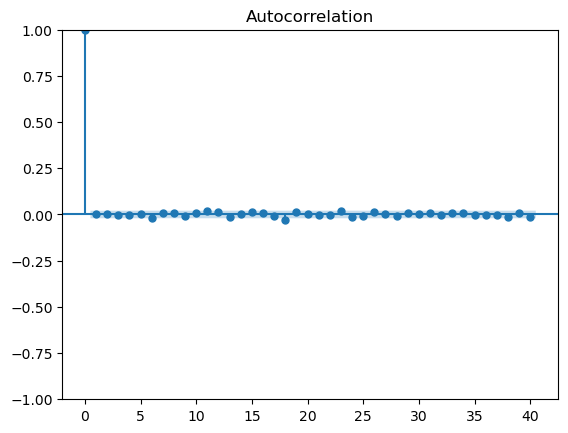

In [453]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

#### From the graph above, we can easily see that there is no autocorrelation.




## Assumption 2- Normality of Residuals 2) The second assumption is the Normality of Residuals / Error terms.



For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [454]:
#H0: the error terms are normally distributed
#dgrees of freedom for residuals is n-2

In [455]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=65051.54524138146, pvalue=0.0)


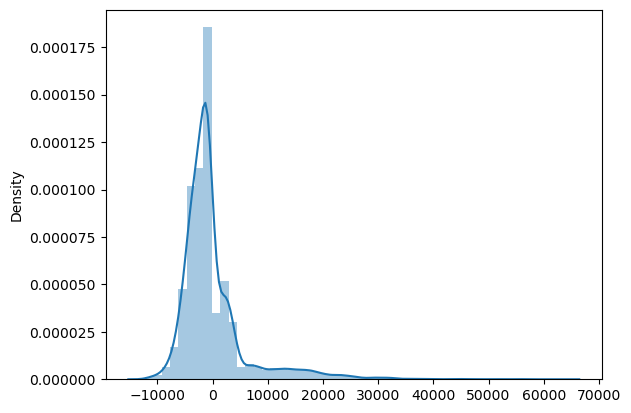

In [456]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

#### From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed

## Asssumption 3 - Linearity of residuals


Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one.



In [457]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(1.0164972729968935, 0.2907128743692436)

H0:The data is linear, pvalue > 0.05 failed to reject H0, here we failed to reject H0 so residuals are linear



## Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test) Homoscedacity ::

 If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are: 𝐻0:𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 𝐻𝑎:𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 


##### The residuals should be homoscedastic.

### Goldfeld Test

In [458]:
import statsmodels.stats.api as sms
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

In [459]:
test

(1.2289680194898234, 2.216740369945354e-12, 'increasing')

#### p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

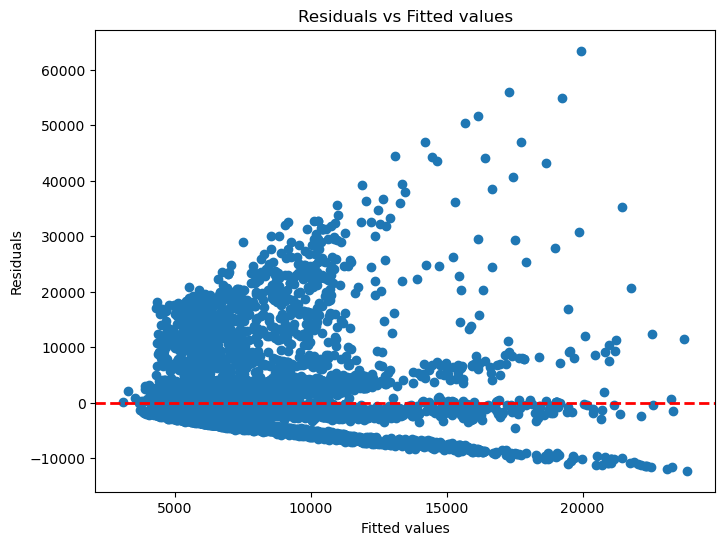

In [460]:
residuals = lin_reg.resid
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(lin_reg.fittedvalues, residuals)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted values")

plt.show()

## Assumption 5- NO MULTI COLLINEARITY



The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.



In [461]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Number of Open Complaints,inf
Number of Policies,inf
State_California,1.878492
State_Nevada,1.378696
State_Oregon,1.813907
State_Washington,1.346631
Response_Yes,1.223327
Coverage_Extended,3.025019
Coverage_Premium,5.293859
Education_College,1.408609


we can see that there is high VIF in column Policy & policy type Also we have seen in statistical approach these veriables are not significant to predict target hence from above 2 conclusion we can remove them

In [462]:
from sklearn.model_selection import train_test_split
X=data.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=data['CLV']
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [463]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 44)
(6393,)
(2741, 44)
(2741,)


# Model Building

## Linear Regression

In [464]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [465]:
y_pred=lr.predict(X_test)

In [466]:
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563165
R^2 score for test: 0.2548416026490219


In [467]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.5772314153490968
MAE 0.4455033282273758
R-squared: 0.2548416026490219


## Rigde and Lasso Regression

In [468]:
from sklearn.linear_model import Ridge, Lasso

In [469]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 0.5772298727275743
R-squared: 0.25484558543933766


In [470]:
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 0.5772173441332211
R-squared: 0.2548779317766182


In [471]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 0.5992937645386806
R-squared: 0.19679167777854611


# Decision Tree

In [472]:
from sklearn.tree import DecisionTreeRegressor

In [473]:
dt = DecisionTreeRegressor(random_state=1)

In [474]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.2658142113605382
MAE 0.10409961446464766
R-squared: 0.8419825409910666


# RandomForest

In [475]:
from sklearn.model_selection import train_test_split
X=data.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(data['CLV'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [476]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.321301
Number of Policies,0.306121
Monthly Premium Auto,0.116669
Total Claim Amount,0.048353
Vehicle Class_SUV,0.022726
Months Since Policy Inception,0.016667
Income,0.016315
Months Since Last Claim,0.016302
Vehicle Class_Luxury Car,0.012916
Vehicle Class_Luxury SUV,0.011914


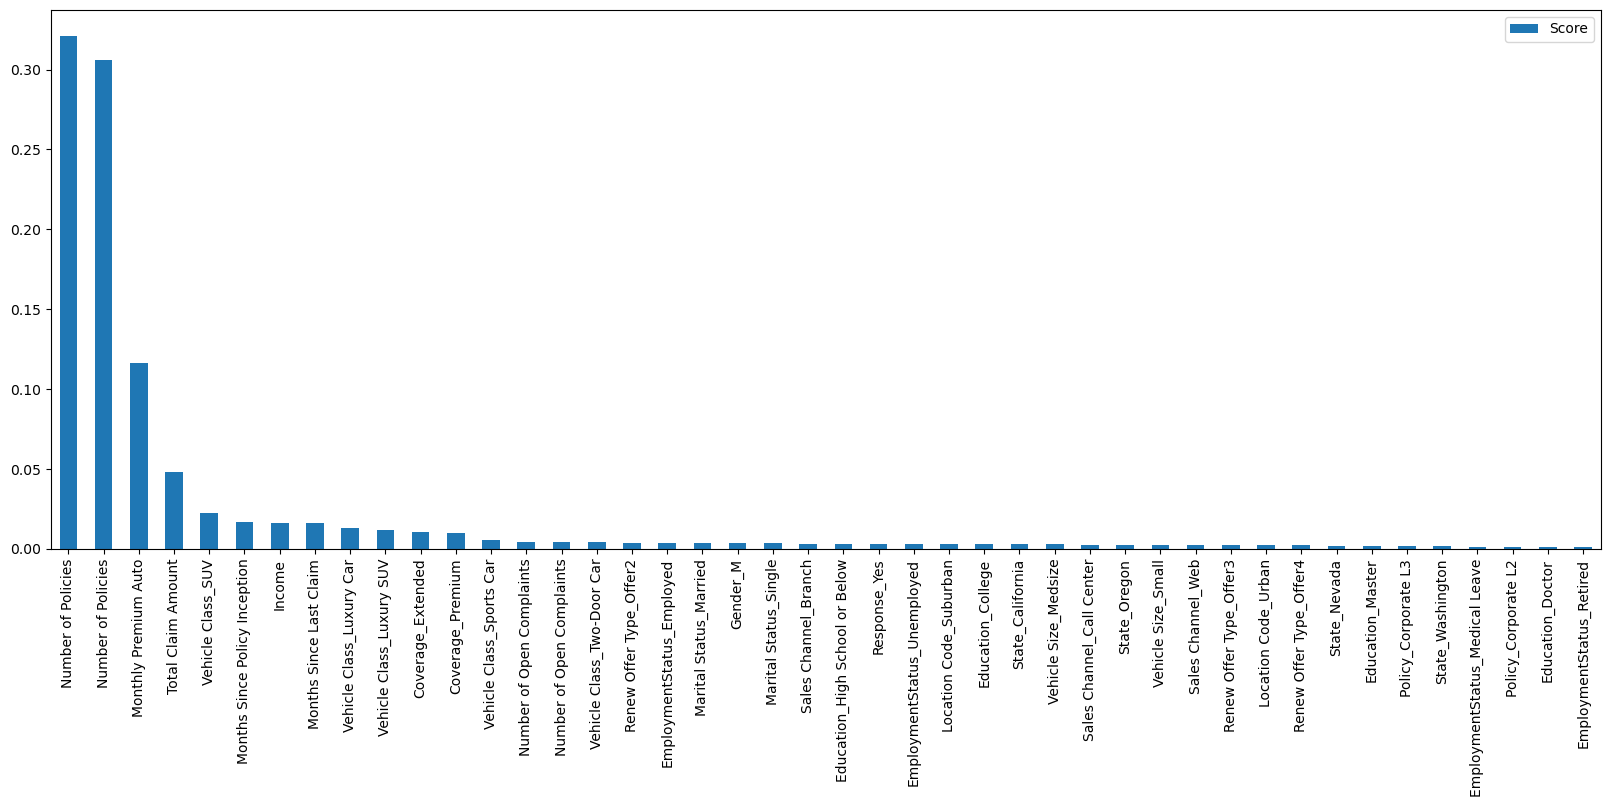

In [477]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

In [478]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1) 

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [479]:
y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.19609373464305707
MAE 0.08882770076847188
R-squared: 0.914004422516944


#### By using Random forest we got highest accuracy so we can go with random forest and will do Hyperparameter tuning of random forest

### Hyperparameter tuning of random forest

In [480]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],

        'n_estimators' : [100,200,50],

        "bootstrap" : [True, False],

        'max_features': ['auto', 'sqrt', 'log2']

        }


In [481]:

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [482]:
rf = RandomForestRegressor(**grid.best_params_)

In [483]:

rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=200)

In [484]:
y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.19943748353088067
MAE 0.0972921838607967
R-squared: 0.9110466613455921


In [485]:
from sklearn.ensemble import AdaBoostRegressor

In [486]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='squared_error'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [487]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.214644268741021
MAE 0.12762554006332638
R-squared: 0.8969644069423214


In [493]:
y_pred

array([8.31064542, 8.59244011, 8.23306997, ..., 8.54767542, 8.54351681,
       9.96164301])

In [490]:
y_test

708      8.348214
47       8.615108
3995     8.244891
1513     8.976493
3686     8.978625
          ...    
4271     8.374558
7923     9.108442
5633     8.616590
8432     8.535716
681     10.281731
Name: CLV, Length: 2741, dtype: float64